# Imports

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data

In [52]:
# Create data frame
df = pd.read_csv("data/dataset_real.csv")


In [53]:
df


,ordine_data,revenue,google_search_spent,google_performance_max_spent,fb_retargeting_spent,fb_prospecting_spent,google_organico,Sconti
0,2020-07-01,1878.71,93.04,0.00,0.00,0.00,0,1
1,2020-07-02,2057.76,81.20,0.00,0.00,0.00,0,1
2,2020-07-03,1930.55,69.40,0.00,0.00,0.00,0,2
3,2020-07-04,778.36,34.94,0.00,0.00,0.00,0,0
4,2020-07-05,1753.69,90.33,0.00,0.00,0.00,0,1
...,...,...,...,...,...,...,...,...
591,2022-02-17,6061.37,347.75,125.32,19.96,30.44,5003,9
592,2022-02-18,3722.15,258.10,79.30,20.31,31.06,4696,14
593,2022-02-19,2670.47,92.04,9.96,23.16,33.75,3058,8
594,2022-02-20,3385.87,86.37,40.50,19.90,30.59,1398,3


In [54]:
# Check basic statistics
df.describe()


,revenue,google_search_spent,google_performance_max_spent,fb_retargeting_spent,fb_prospecting_spent,google_organico,Sconti
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,6391.668943,204.011393,21.190017,9.182970,19.015906,1464.112416,10.807047
std,3857.523928,142.908749,34.288787,16.046709,25.997267,2543.398401,22.848894
min,32.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3628.725000,93.167500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5752.050000,177.655000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,8287.240000,263.187500,42.102500,19.682500,32.190000,2974.500000,12.000000
max,27815.430000,912.410000,178.470000,124.140000,135.470000,8836.000000,173.000000


In [55]:
# Check missing values
df.isna().sum()


ordine_data                     0
revenue                         0
google_search_spent             0
google_performance_max_spent    0
fb_retargeting_spent            0
fb_prospecting_spent            0
google_organico                 0
Sconti                          0
dtype: int64

In [56]:
# Check data types
df.dtypes


ordine_data                      object
revenue                         float64
google_search_spent             float64
google_performance_max_spent    float64
fb_retargeting_spent            float64
fb_prospecting_spent            float64
google_organico                   int64
Sconti                            int64
dtype: object

In [57]:
# Change date data type column from string to datetime
df["ordine_data"] = pd.to_datetime(df["ordine_data"])


In [58]:
# Check for years and days count in each year
df["ordine_data"].dt.year.value_counts()


2021    361
2020    183
2022     52
Name: ordine_data, dtype: int64

We see that some days are missing in 2021 because we only have 361 values instead of 365.

In [59]:
# Check if we only have 12 months in data
months_in_df = sorted(df["ordine_data"].dt.month.unique())
months_list = [month for month in range(1, 13)]
months_in_df == months_list


True

In [60]:
# Check if we only have 31 days in data
days_in_df = sorted(df["ordine_data"].dt.day.unique())
days_list = [day for day in range(1, 32)]
days_in_df == days_list


True

In [61]:
# Check correlation map
df.corr().style.background_gradient(cmap = "coolwarm")


,revenue,google_search_spent,google_performance_max_spent,fb_retargeting_spent,fb_prospecting_spent,google_organico,Sconti
revenue,1.000000,0.158135,-0.217984,-0.212061,-0.294907,-0.086580,0.551863
google_search_spent,0.158135,1.000000,0.253990,0.336720,0.387373,0.221361,0.113703
google_performance_max_spent,-0.217984,0.253990,1.000000,0.245441,0.309073,0.573396,0.030912
fb_retargeting_spent,-0.212061,0.336720,0.245441,1.000000,0.870278,0.219663,-0.017276
fb_prospecting_spent,-0.294907,0.387373,0.309073,0.870278,1.000000,0.148569,-0.067479
google_organico,-0.086580,0.221361,0.573396,0.219663,0.148569,1.000000,0.209871
Sconti,0.551863,0.113703,0.030912,-0.017276,-0.067479,0.209871,1.000000


We can see that 'Sconti,' which refers to discounts, is strongly correlated with revenues, which is quite logical and shows that we achieve a real increase in revenues through promotions.

It is worth noting that the second most impacting channel on revenues is Google search. However, we notice that Facebook does not have as much impact; it even has a negative impact on revenues.

Nevertheless, it is interesting to note that the increase in Google search expenses is correlated with Facebook expenses. Considering that spending on Google search can mainly increase due to higher search interest in the purchased keywords, we can establish the hypothesis that Facebook spending increases user interest in keywords purchased on Google. So, intrinsically, the Google search budget is linked to revenues, and the Google search budget is linked to the Facebook expenses.

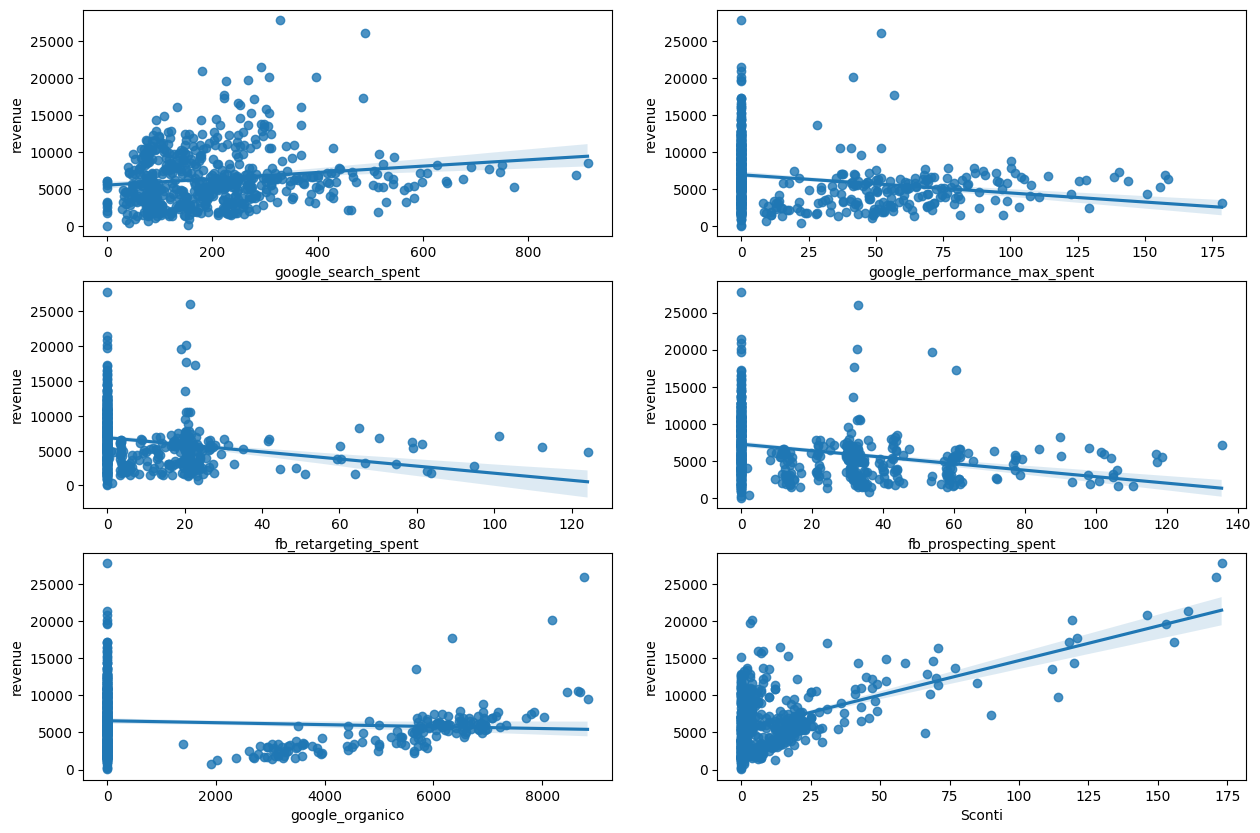

In [71]:
# Check data via regression plot
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.regplot(x = "google_search_spent", y = "revenue", data = df, ci = 95)
plt.subplot(3,2,2)
sns.regplot(x = "google_performance_max_spent", y = "revenue", data = df, ci = 95)
plt.subplot(3,2,3)
sns.regplot(x = "fb_retargeting_spent", y = "revenue", data = df, ci = 95)
plt.subplot(3,2,4)
sns.regplot(x = "fb_prospecting_spent", y = "revenue", data = df, ci = 95)
plt.subplot(3,2,5)
sns.regplot(x = "google_organico", y = "revenue", data = df, ci = 95)
plt.subplot(3,2,6)
sns.regplot(x = "Sconti", y = "revenue", data = df, ci = 95);


Here we have our confirmation that discounts and Google search spent are the mose correlated data to revenues.

In [72]:
fig = px.line(df, x = df["ordine_data"], y = df.columns)
fig.show()


We can see that revenues highly increase around the end of december, especially on the 21st. 
Let's focus on quarter 4 of 2020 and 2021. 

In [76]:
q4_2020_mask = (df["ordine_data"] > "2020-09-30") & (df["ordine_data"] < "2021-01-01")
q4_2021_mask = (df["ordine_data"] > "2021-09-30") & (df["ordine_data"] < "2022-01-01")


In [79]:
df_q4_2020 = df[q4_2020_mask]
df_q4_2021 = df[q4_2021_mask]


In [80]:
df_q4_2020


,ordine_data,revenue,google_search_spent,google_performance_max_spent,fb_retargeting_spent,fb_prospecting_spent,google_organico,Sconti
91,2020-10-01,8872.55,96.84,0.0,0.0,0.0,0,0
92,2020-10-02,7063.05,61.47,0.0,0.0,0.0,0,0
93,2020-10-03,3964.66,53.49,0.0,0.0,0.0,0,0
94,2020-10-04,7146.57,85.59,0.0,0.0,0.0,0,0
95,2020-10-05,11264.39,105.34,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...
178,2020-12-27,6479.29,358.05,0.0,0.0,0.0,0,37
179,2020-12-28,21459.86,291.95,0.0,0.0,0.0,0,161
180,2020-12-29,14625.93,252.36,0.0,0.0,0.0,0,69
181,2020-12-30,11539.21,203.72,0.0,0.0,0.0,0,49


In [85]:
columns_to_check = ["google_performance_max_spent", "fb_retargeting_spent", "fb_prospecting_spent", "google_organico"]
for column in columns_to_check:
    total_spent = df_q4_2020[column].sum()
    print(f"The total amount spent for {column} is {total_spent}")


The total amount spent for google_performance_max_spent is 0.0
The total amount spent for fb_retargeting_spent is 0.0
The total amount spent for fb_prospecting_spent is 0.0
The total amount spent for google_organico is 0


We can see that in the most profitable period in terms of revenues, we only google search and sconti data. The others channels are switched off, but it's also during this period that the sales are the highest. That can explain why we have a negative correlation between facebook expenses and revenues. 

In [86]:
df_q4_2021


,ordine_data,revenue,google_search_spent,google_performance_max_spent,fb_retargeting_spent,fb_prospecting_spent,google_organico,Sconti
452,2021-10-01,3259.89,0.00,0.00,0.00,11.46,5482,14
453,2021-10-02,2036.57,0.00,0.00,0.00,11.58,3143,8
454,2021-10-03,2537.66,0.00,0.00,0.00,12.69,3259,5
455,2021-10-04,5131.19,0.00,0.00,0.00,8.20,6597,16
456,2021-10-05,5867.37,0.00,0.00,0.00,11.16,6865,26
...,...,...,...,...,...,...,...,...
539,2021-12-27,6543.32,251.04,51.75,21.65,32.91,6468,21
540,2021-12-28,7426.74,506.36,19.68,21.79,32.80,6011,15
541,2021-12-29,4921.18,562.99,58.91,20.22,31.86,5644,18
542,2021-12-30,6507.90,301.05,35.34,20.23,33.04,4811,12


In [88]:
columns_to_check = ["google_performance_max_spent", "fb_retargeting_spent", "fb_prospecting_spent", "google_organico"]
for column in columns_to_check:
    total_spent = df_q4_2021[column].sum()
    print(f"The total amount spent for {column} is {round(total_spent, 2)}")


The total amount spent for google_performance_max_spent is 3700.39
The total amount spent for fb_retargeting_spent is 1146.94
The total amount spent for fb_prospecting_spent is 2182.16
The total amount spent for google_organico is 510828


As we can see it's not the case in 2021, we have expenses for these channels during this year. But let's check the amount of revenues between the 2 years. 

In [96]:
q4_2020_revenues = df_q4_2020["revenue"].sum()
q4_2021_revenues = df_q4_2021["revenue"].sum()

round(((q4_2021_revenues - q4_2020_revenues) / q4_2020_revenues * 100), 2)


-49.32

We can observe a huge revenues decrease between 2021 and 2020. Indeed near 50% of 2020 revenues disappeared in 2021, and on top of that we spent more marketing budget. We have to find out why with other teams. 
Perhaps covid naturally increased sales during 2020? Let's run an OLS regression and see the coefficient of each channel on revenues and then add lockdown data. 

In [97]:
# TODO
# OLS
# Ajout covid
# 2e OLS
# Linear regression
